<a href="https://colab.research.google.com/github/MalikHasnat1999/ZTM_Tensorflow/blob/master/08_NLP_Funndamentals_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP 
NLP has the goal of driving information out of natural language (could be sequence of text or speech).

Another common term for NLP problems is sequence to sequence problems(seq2seq).

# Import Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime

# Check for GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-660b7fb1-131d-2f2e-46b0-a3207a7b9d65)


# Get Helper Functions

In [ ]:
def unzip_file(file_name):
  import zipfile

  zip_ref = zipfile.ZipFile(file_name)
  zip_ref.extractall()
  zip_ref.close()

def create_tensorboard_callback(dir_name, experiment_name):
  """
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%D%M%Y-%h%m%s")
  create_tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

  return create_tensorboard_callback

# Get a Text Dataset

The dataset we are going to use is Kaggle's introduction to NLP dataset (text sample of Tweets labeled as disaster or not disaster)


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-09-13 12:27:31--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2021-09-13 12:27:32 (86.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_file("nlp_getting_started.zip")

# Become one with the Data

Visualize, Visualize, Visualize

To Visulize our text samples, we first have to read them in, one way to do so would be python 

But i prefer to get viusal starting away.

So, another way to do this is to use **Pandas**

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
# Shuffle the training dataframe so that our model does not learn any order from it
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# what does our test data look like
# Test data doesn't have any labels (Target)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# how much examples of each class of target (target-> positive, Negative)
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# how many total samples
len(train_df), len(test_df)

(7613, 3263)

## i).Random Training Examples

In [ ]:
# Lets Visualize some random training examples
import random

random_index = random.randint(0, len(train_df)-3)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print("Disaster\n" if target==0 else "Not Disaster\n")
  print(f"Tweet : {text}\n-------\n")

Disaster

Tweet : If this ATL to San Fran flight goes down in a  desolate square state it's been real Twitter.
-------

Disaster

Tweet : Does This Prepare Us? HHS Selects 9 Regional Special #Pathogen Treatment Centers #Bioterrorism #Infectious #Ebola http://t.co/Qmo1TxxDkj
-------

Not Disaster

Tweet : Thunder lightening torrential rain and a power cut!
-------

Disaster

Tweet : @wisdc &amp; obama supports  death2USA .. http://t.co/serARcNrbY
-------

Disaster

Tweet : @troylercraft YEAH ITS NOT WORTH IT BC HE ALREADY HAS SO MANY SPAMMERS &amp; HIS TWITTER IS PROBABLY BLOWN UP EVERY SECOND
-------



## ii).Split data into Training and Validation sets

In [ ]:
# import train_test_split 
from sklearn.model_selection import train_test_split

In [ ]:
# using train_test_split to split data
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation
                                                                            random_state=42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:

len(train_df)

7613

In [ ]:

train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

we need to convert our text data into numbers so that it can be fed to the RNN(Recurrent Neural Network)

In [ ]:
pd.DataFrame({"text": train_sentences,
              "target": train_labels}).head(50)

,text,target
0,@mogacola @zamtriossu i screamed after hitting...,0
1,Imagine getting flattened by Kurt Zouma,0
2,@Gurmeetramrahim #MSGDoing111WelfareWorks Gree...,1
3,@shakjn @C7 @Magnums im shaking in fear he's g...,0
4,Somehow find you and I collide http://t.co/Ee8...,0
5,@EvaHanderek @MarleyKnysh great times until th...,1
6,destroy the free fandom honestly,1
7,Weapons stolen from National Guard Armory in N...,0
8,@wfaaweather Pete when will the heat wave pass...,1
9,Patient-reported outcomes in long-term survivo...,1


# Convert Text into numbers

When Dealing with the text problem, one of the first thing you will have to do before you can build a model is to convert your text into numbers 

There are few ways to do this namely:
* Tokenization: direct mapping of token (a token could be a word or character) to number
* Embedding: create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

## i).Text vectorization(Tokenization)

In [ ]:
# how our dataset looks like
train_sentences[:3]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....'],
      dtype=object)

In [ ]:
# use the default TextVectoriztion layer parameters
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=None, # how many word in the vocabulary (automatically adds token that looks like this <OOV>)
                                                    standardize="lower_and_strip_punctuation",
                                                    split="whitespace",
                                                    ngrams=None,  # create groups of n-words?
                                                    output_mode="int",  # how to map tokens to numbers
                                                    output_sequence_length=None, # how long do you want your sequence to be?
                                                    pad_to_max_tokens=False)

In [ ]:
train_sentences[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# find the total number of tokens in training tweets
sum([len(i.split()) for i in train_sentences])

102087

In [ ]:
# find the average number of tokens in training tweets
sum([len(i.split()) for i in train_sentences]) / len(train_sentences)

14.901036345059115

In [ ]:
# setup text vectorization variables
max_vocab_length = 10000  # max numbers to have in our vocabulary
max_length = 15  # max length our sequences will be (e.g how mnay words from Tweet does a model see?)

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_vocab_length,
                                                    output_mode="int",
                                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer

In [ ]:
# fit the text_vectorizer to traininig data
text_vectorizer.adapt(train_sentences)

In [ ]:
# Let's take a simple examople
sample_sentence = "earthquake hit new york"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[290, 244,  50, 913,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# choose a ranodm sentence from training sentences and tokenize it
random_sample = random.choice(train_sentences)
print(f"Original:\n {random_sample}")
print(f"Tokenized: \n {text_vectorizer([random_sample])}")

Original:
 Tried orange aftershock today. My life will never be the same
Tokenized: 
 [[1055 3555  966  124   13  129   38  192   21    2  726    0    0    0
     0]]


In [ ]:
# Get unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all the unique words in the training data
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Total words in Vocabulary : {len(words_in_vocab)}")
print(f"Top 5 unique Words : {top_5_words}")
print(f"Least unique Words : {bottom_5_words}")

Total words in Vocabulary : 10000
Top 5 unique Words : ['', '[UNK]', 'the', 'a', 'in']
Least unique Words : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## ii).Embedding using Embedding Layer

The paremeters we care about the most for our embedding layer are:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example the value of 100 would mean each token gets represented by 100 long vector
* `input_length` = length of the sequences being passed to the embedding layer

In [ ]:
# create a embedding layer
embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length, # input shape
                                      output_dim=128, # ouput shape
                                      input_length=max_length) # how long is each input (15)
embedding

In [ ]:
max_vocab_length, max_length

(10000, 15)

interger values must be passed through the embedding layer

first vecotrize the train_sentences than pass through the embedding layer.

In [ ]:
# Get a random sentence from the training data
random_sample = random.choice(train_sentences)
print(f"Original : \n {random_sample}\n")
print(f"Embedded : \n shape : {embedding(text_vectorizer([random_sample])).shape}\n{embedding(text_vectorizer(random_sample))}")

Original : 
 Three Israeli soldiers wounded in West Bank terrorist attack - Haaretz http://t.co/u4gSBNU8wc

Embedded : 
 shape : (1, 15, 128)
[[-2.4106860e-02 -4.2147063e-02 -4.0294886e-02 ... -4.5796525e-02
  -9.4424933e-05  4.4030014e-02]
 [ 1.5396152e-02 -4.4888210e-02  4.9112502e-02 ... -3.3556975e-02
   1.3128016e-02 -1.6140234e-02]
 [ 1.7540064e-02 -3.2345213e-02  2.8380360e-02 ...  4.3540429e-02
   6.3191280e-03 -2.3861861e-02]
 ...
 [-2.2711866e-03 -4.8646107e-03 -4.7869362e-02 ...  7.5520985e-03
   2.9317055e-02  4.1870404e-02]
 [-2.2711866e-03 -4.8646107e-03 -4.7869362e-02 ...  7.5520985e-03
   2.9317055e-02  4.1870404e-02]
 [-2.2711866e-03 -4.8646107e-03 -4.7869362e-02 ...  7.5520985e-03
   2.9317055e-02  4.1870404e-02]]


# Modeling a text dataset (running a series of experiment)
Now that we have got a way to turn our text into numbers, its time to start building a series of modelling experiments

We will start from baseline and move on from there
* Model 0: Naive Bayes(baseline), this is from [sk-learn ML map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* Model 1: feed-forward neural network (Dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub pretrained Feature Extractor(using transfer learning for NLP)
* Model 7: same as model 6 with 10% of training data

Now how are we going to approach these?

Use the standard step in modelling with tensorflow
* Create a Model
* Build a Model
* Fit a Model
* Evaluate our Model

# Creating a Evaluation function for our model experiments

We could evaluate all of our model predictions with different metrics everytime

Lets create a function that compare our ground truth labels with the predicted values
* Accurcy
* Precision
* Recall
* F1-score

For the deep understanding of model evaluation [read this](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_model(y_true, y_pred):
  """
  Returns:
    Model Evaluation Dictionary.
  """
  # calculate the model accuracy_score
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # calculate model precision, recall and f1-score using "weighted" average
  model_precision, model_recall, model_f1,_ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {
      "accuracy": model_accuracy,
      "precision": model_precision,
      "recall": model_recall,
      "f1": model_f1
  }

  return model_results

# Model 0: Naive Bayes (Baseline model)
As with all machine learning modelling experiments, its important to create basline model so that you have a benchmark for future experiments to build upon.

To create our baseline we'll use Sklearn's **Naive bayes** using the **TF-IDF** formula to convert our words into text

> **Note:** it is a common practice to use Non-Deep-Learning algorithms as a baseline because of their speed and later using the Deep Learning to see if you can improve on them 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create Tokenization and modelling pipline
model_0 = Pipeline([
                ("tfidf",TfidfVectorizer()), # convert words to numbers using tfidf
                ("clf", MultinomialNB()) # model the text
])

# fit the pipline to training data
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# Evaluate the base model
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [ ]:
# Make prediction
baseline_pred = model_0.predict(val_sentences)
baseline_pred[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
# Evaluate the model 0
model_0_results = evaluate_model(val_labels, baseline_pred)
model_0_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

# Model 1: Feed-Forward Neural Network (Dense Model)

In [ ]:
# create TensorBoard callback (need to create a new one for each model

In [ ]:
# Build Model with Functional API (more Flexible)

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string) # inputs are 1D string 
x = text_vectorizer(inputs)  # turn text into numbers
x = embedding(x) # create embedding of numberized inputs
x = tf.keras.layers.GlobalAveragePooling1D()(x) # condence the feature vector for each token to one vector
# x = tf.keras.layers.GlobalMaxPool1D()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# create Model using inputs and outputs
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_1.fit(x=train_sentences, y=train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback("models",
                                                   "model_1_feed-forward Neural Network")])

Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.6127 - accuracy: 0.6930 - val_loss: 0.5386 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4421 - accuracy: 0.8175 - val_loss: 0.4720 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3472 - accuracy: 0.8605 - val_loss: 0.4612 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2847 - accuracy: 0.8901 - val_loss: 0.4628 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2379 - accuracy: 0.9085 - val_loss: 0.4800 - val_accuracy: 0.7887


In [ ]:
# evaluate the model
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.7887


[0.47998911142349243, 0.7887139320373535]

In [ ]:
# Make some prediction and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape 

(762, 1)

In [ ]:
len(val_sentences)

762

In [ ]:
model_1_pred_probs[0]

array([0.34871614], dtype=float32)

In [ ]:
# convert model prediction probabilites to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) 
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_1_results = evaluate_model(y_true=val_labels,
                                 y_pred=model_1_preds)
model_1_results

{'accuracy': 78.87139107611549,
 'f1': 0.7852145092095362,
 'precision': 0.7953441303708004,
 'recall': 0.7887139107611548}

In [ ]:
model_0_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Visualize Learned Embedding

In [ ]:
# get the word from the text vectorizer vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:5]

(10000, ['', '[UNK]', 'the', 'a', 'in'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# get the weighted matrix of the embedding layer
# (These are numerical representation of each token (word) in our training data)
embedding_weights = model_1.get_layer("embedding").get_weights()[0]
embedding_weights.shape # same size as our vocab_size and embedding_dims

(10000, 128)

Now that we have got the embedding matrix our model has learned to represent our tokens, lets see how we can visualize it

To do so Tensorflow has handy tool called [TensorFlow Projector](https://projector.tensorflow.org/)

In [ ]:
# (ALL of this code is copied)
import io

# Create embedding files (we got this from tensorflow's word embedding documentation )
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embedding_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()


In [ ]:
# # Download files from colab to upload to projector
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

Downloading the files above we can visualize them using TensorFlow Projector and Clicking the "Load" Button 

> ***Resources:*** If you would like to know more about Embedding, I'd encourage you to Check out 
* Jay Alammars visualized word2vec post 
* TensorFlow Word Embeddings guide


# Q:Recurrent Neural Networks (RNN)

RNN are useful for sequence data.

The premise of a Recurrent Neural Network is to use the *representation of previous input to aid the representation of a later input*.

> ***Resources:*** If you want an overview of internal of a recurrent neural network, see the following,
* MIT's sequence modelling lectures
* Chris Olah's intro to LSTMs
* Andrej Karpathys the unresonable effectiveness of recurrent neural networks

# Model 2: LSTM (RNN)

LSTM = Long Short Term Memory (on of the most popular LSTM)

Our typical architecture of RNN looks like this:

`Input(text) -> Tokenize -> Embedding -> Layer(RNN) -> Ouput (label Probability)`

In [ ]:
# create LSTM model
inputs = tf.keras.Input(shape=(1,), dtype=tf.string, name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.LSTM(64, return_sequences=True) # When you are stacking RNN cells together, you need to return_sequences=True
x = tf.keras.layers.LSTM(64)(x) # Units=64, Multiple of 8
outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

# create Model using inputs and outputs
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_2_history = model_2.fit(x=train_sentences, y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback("models",
                                                                     "model_2_LSTM(RNN)")])

Epoch 1/5
215/215 [==============================] - 8s 15ms/step - loss: 0.2255 - accuracy: 0.9206 - val_loss: 0.5464 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1569 - accuracy: 0.9447 - val_loss: 0.6581 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1277 - accuracy: 0.9511 - val_loss: 0.6459 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1047 - accuracy: 0.9593 - val_loss: 0.7873 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0852 - accuracy: 0.9667 - val_loss: 0.8510 - val_accuracy: 0.7835


In [ ]:
# evaluate the model
model_2.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.8510 - accuracy: 0.7835


[0.8510134816169739, 0.7834645509719849]

In [ ]:
# Make predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

((762, 1), array([[9.6324645e-03],
        [9.3918818e-01],
        [9.9977094e-01],
        [1.2832579e-01],
        [5.9300015e-04],
        [9.9739146e-01],
        [7.2118652e-01],
        [9.9977463e-01],
        [9.9958283e-01],
        [7.8552318e-01]], dtype=float32))

In [ ]:
y_pred = tf.squeeze(tf.round(model_2_pred_probs))
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# use evaluate_model()
model_2_results = evaluate_model(val_labels,
                                 y_pred)
model_2_results

{'accuracy': 78.34645669291339,
 'f1': 0.782225309795662,
 'precision': 0.7839822035668361,
 'recall': 0.7834645669291339}

In [ ]:
# Baseline model
model_0_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

Our Baseline model is still doing far batter then the LSTM model

# Model 3: GRU (RNN)

Another popular and effective RNN is GRU or Gated Recurrent Unit

The GRU cell has similar features as LSTM but less parameters

``

In [ ]:
# Build the GRU (RNN) model
inputs = tf.keras.Input(shape=(1,), dtype=tf.string, name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GRU(units=64)(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

# create model using inputs and outputs
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_3_history = model_3.fit(x=train_sentences, y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback("models",
                                                                     "model_3_GRU(RNN)")])

Epoch 1/5
215/215 [==============================] - 5s 15ms/step - loss: 0.1522 - accuracy: 0.9438 - val_loss: 0.7145 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0846 - accuracy: 0.9702 - val_loss: 0.8262 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0762 - accuracy: 0.9702 - val_loss: 0.8017 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0656 - accuracy: 0.9749 - val_loss: 1.0180 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0589 - accuracy: 0.9747 - val_loss: 1.1735 - val_accuracy: 0.7730


In [ ]:
# evaluate the model
model_3.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 1.1735 - accuracy: 0.7730


[1.1735069751739502, 0.7729659080505371]

In [ ]:
# Make prediction
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

((762, 1), array([[1.3788575e-03],
        [9.1079819e-01],
        [9.9988055e-01],
        [3.9532606e-02],
        [8.3788276e-05],
        [9.9954802e-01],
        [8.4820747e-01],
        [9.9994183e-01],
        [9.9986696e-01],
        [8.9491904e-01]], dtype=float32))

In [ ]:
model_3_pred = tf.squeeze(tf.round(model_3_pred_probs))
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# use the evaluate_model()
model_3_results = evaluate_model(val_labels,
                                 model_3_pred)
model_3_results

{'accuracy': 77.29658792650919,
 'f1': 0.7704381702262061,
 'precision': 0.775649278370019,
 'recall': 0.7729658792650919}

In [ ]:
# Baseline model
model_0_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

# Model 4: Bidirectional-LSTM (RNN)

Normal RNN are uni-directional, they go from left to right while the bidirectional RNN goes from left to rigth as well as from right to left.

In [ ]:
# Build the bidirectionl-LSTM
inputs = tf.keras.Input(shape=(1,), dtype=tf.string, name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

# create the model
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


Bidirectional has **128** dims cause it is bidirectional **left-to-right (64)**, **right-to-left (64)**




In [ ]:
# compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_4_history = model_4.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback("models",
                                                                    "model_4_bidirectional(RNN)")])

Epoch 1/5
215/215 [==============================] - 8s 22ms/step - loss: 0.0996 - accuracy: 0.9712 - val_loss: 0.9717 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0527 - accuracy: 0.9764 - val_loss: 1.2747 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0457 - accuracy: 0.9778 - val_loss: 1.1200 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0462 - accuracy: 0.9793 - val_loss: 1.4732 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0405 - accuracy: 0.9810 - val_loss: 1.4286 - val_accuracy: 0.7664


In [ ]:
# Evaluate the model
model_4.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 7ms/step - loss: 1.4286 - accuracy: 0.7664


[1.4285907745361328, 0.7664042115211487]

In [ ]:
# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs.shape, model_4_pred_probs[:10]

((762, 1), array([[2.0957952e-04],
        [7.3945612e-01],
        [9.9998236e-01],
        [1.7897531e-01],
        [3.3122433e-05],
        [9.9943942e-01],
        [8.5111350e-01],
        [9.9998748e-01],
        [9.9997723e-01],
        [9.9791926e-01]], dtype=float32))

In [ ]:
model_4_pred = tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# use evaluate_model()
model_4_results = evaluate_model(val_labels,
                                 model_4_pred)
model_4_results

{'accuracy': 76.64041994750657,
 'f1': 0.7640154753782149,
 'precision': 0.7684333697179313,
 'recall': 0.7664041994750657}

In [ ]:
# GRU(RNN) results
model_3_results

{'accuracy': 77.29658792650919,
 'f1': 0.7704381702262061,
 'precision': 0.775649278370019,
 'recall': 0.7729658792650919}

Bidrectional Model is doing far worse than any other RNN model

# Convolutional Neural Network for Text (and other type of sequences)

We have used CNN for images but images are 2D... However our text data is 1D

The typical structure of Conv1D layer for sequences (in our case text)

`
Inputs(text) -> Tokenization -> Embedding -> (Conv1D + Pooling) -> Outputs(class probabilites)
`

For different explaination of parameters see:
* Diffence b/w 'same' and 'valid' padding: https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t 

In [ ]:
# Test out out embedding layer, Conv1D layer and max pooling layer
embedding_layer = embedding(text_vectorizer(["This is a testing sentence"]))
conv1d_layer = tf.keras.layers.Conv1D(filters=64,
                                      kernel_size=5, # ngram of 5 words
                                      strides=1,
                                      activation="relu",
                                      padding="same") # default "valid" output is smaller than the input shape, "same" meaning ouput and input are same

conv1d_output = conv1d_layer(embedding_layer)
max_pool = tf.keras.layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv1d_output)

embedding_layer.shape, conv1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 64]), TensorShape([1, 64]))

In [ ]:
#embedding_layer

In [ ]:
#conv1d_output

In [ ]:
#max_pool_output

# Model 5: 1D Convolutional Neural Network

In [ ]:
# Build the model
inputs = tf.keras.Input(shape=(1,), dtype=tf.string, name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="valid")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

# create the model
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1d")

In [ ]:
model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
__________________________________________

In [ ]:
# Compile the model
model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_5_history = model_5.fit(x=train_sentences, y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback("models",
                                                                     "model_5_conv1D")])

Epoch 1/5
215/215 [==============================] - 4s 11ms/step - loss: 0.1230 - accuracy: 0.9587 - val_loss: 0.9548 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0742 - accuracy: 0.9724 - val_loss: 1.0612 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0626 - accuracy: 0.9750 - val_loss: 1.1523 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0555 - accuracy: 0.9771 - val_loss: 1.2438 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0519 - accuracy: 0.9783 - val_loss: 1.2522 - val_accuracy: 0.7546


In [ ]:
model_5.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.2522 - accuracy: 0.7546


[1.2521549463272095, 0.7545931935310364]

In [ ]:
# Make predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[2.31015813e-02],
       [8.51560295e-01],
       [9.99871731e-01],
       [1.21280536e-01],
       [3.03315062e-07],
       [9.94029880e-01],
       [8.70250404e-01],
       [9.99840975e-01],
       [9.99999762e-01],
       [9.42246318e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# use evaluate_model()
model_5_results = evaluate_model(val_labels,
                                 model_5_preds)
model_5_results

{'accuracy': 75.45931758530183,
 'f1': 0.7529524951810874,
 'precision': 0.7549417854127627,
 'recall': 0.7545931758530183}

In [ ]:
# baseline model
model_0_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

# Model 6: TensorFlow Hub Pretrained Sentence Encoder


In [ ]:
sample_sentence

'earthquake hit new york'

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_sample = embed([sample_sentence])

In [ ]:
embed_sample[0][:50]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.0064649 , -0.01758436, -0.01333718, -0.00351964,  0.06985105,
        0.04407538, -0.05760734, -0.04750454,  0.04691634,  0.06398599,
        0.01446668,  0.03338726, -0.00163113, -0.06856813,  0.061738  ,
       -0.03786888,  0.00372992, -0.07559349,  0.04492008, -0.01313149,
       -0.01929411, -0.05176137,  0.05398419,  0.07122506, -0.07073363,
        0.0048399 , -0.02142002, -0.03635834, -0.00241713, -0.06495362,
       -0.02936422, -0.05900885, -0.05008752, -0.02869363, -0.07126758,
        0.04351207, -0.03947387,  0.0784016 , -0.01701517, -0.05543587,
       -0.06472812,  0.04734172, -0.06061318, -0.05577688, -0.07139776,
        0.04298637, -0.00562776, -0.02409728, -0.05772136, -0.04314713],
      dtype=float32)>

In [ ]:
embed_sample[0].shape

TensorShape([512])

In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        dtype=tf.string,
                                        input_shape=[])

In [ ]:
# create the sequential model
model_6 = tf.keras.Sequential([
              sentence_encoder_layer,
              tf.keras.layers.Dense(64, activation="relu"),
              tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")              
], name="model_6_USE")

# Compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# fit the model
model_6_history = model_6.fit(x=train_sentences, y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback("models",
                                                                     "model_6_USE")])

Epoch 1/5
215/215 [==============================] - 10s 32ms/step - loss: 0.5092 - accuracy: 0.7787 - val_loss: 0.4495 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4141 - accuracy: 0.8181 - val_loss: 0.4396 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4009 - accuracy: 0.8221 - val_loss: 0.4363 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3925 - accuracy: 0.8253 - val_loss: 0.4278 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3852 - accuracy: 0.8308 - val_loss: 0.4309 - val_accuracy: 0.8150


In [ ]:
# Evaluate the model
model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 17ms/step - loss: 0.4309 - accuracy: 0.8150


[0.43087512254714966, 0.8149606585502625]

In [ ]:
# Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.1516359 ],
       [0.75027746],
       [0.9863188 ],
       [0.21617892],
       [0.6869952 ],
       [0.7023173 ],
       [0.9781174 ],
       [0.97687143],
       [0.91773325],
       [0.09283023]], dtype=float32)

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# use evaluate_model()
model_6_results = evaluate_model(val_labels,
                                 model_6_preds)
model_6_results

{'accuracy': 81.49606299212599,
 'f1': 0.813013156274745,
 'precision': 0.8186374796992019,
 'recall': 0.8149606299212598}

In [ ]:
# Baseline model
model_0_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

Finally our Transfer Learning Model Beats the Baseline Model

# Model 7: TF Hub Pretrained USE but with 10% of Training Data

Transfer Learning is really useful when you have small amount of data.

To see how out model do on small datasets we will replicate the `model_6` but with only 10% of the training data

In [ ]:
# The below partition of data causes the DATA LEAKAGE

# # Create subsets of the training data
# train_10_precent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)

# # Now divde the 10% data into features and labels
# train_sentences_10 = train_10_precent["text"].to_numpy()
# train_labels_10 = train_10_precent["target"].to_numpy()

# len(train_sentences_10), len(train_labels_10)

**Note:** Be *very* careful when creating a train/val/ test_splits that you dont leak the data across datasets, otherwise your model evaluation matrix will be wrong. If somthing looks too good to be true (a model trained on 10% of the dataset outperforms the model trained on 100% of dataset) trust you gut and go back through to find where the error may lie

In [ ]:
# Spliting the data so it does not creates Data Leakages

split_10_precent = int(0.1 * len(train_sentences))

train_sentences_10_percent = train_sentences[:split_10_precent]
train_labels_10_percent = train_labels[:split_10_precent]

len(train_sentences_10_percent), len(train_labels_10_percent)

(685, 685)

In [ ]:
pd.Series(train_labels_10_percent).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# Lets build a model same as model 6
model_7 = tf.keras.models.clone_model(model_6)

# Compile the model
model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# fit the model
model_7_history = model_7.fit(x=train_sentences_10_percent, y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback("models",
                                                                     "model_7_USE_10_precent")])

Epoch 1/5
22/22 [==============================] - 6s 135ms/step - loss: 0.6675 - accuracy: 0.6847 - val_loss: 0.6443 - val_accuracy: 0.7388
Epoch 2/5
22/22 [==============================] - 1s 48ms/step - loss: 0.5932 - accuracy: 0.7956 - val_loss: 0.5838 - val_accuracy: 0.7598
Epoch 3/5
22/22 [==============================] - 1s 34ms/step - loss: 0.5161 - accuracy: 0.8131 - val_loss: 0.5335 - val_accuracy: 0.7730
Epoch 4/5
22/22 [==============================] - 1s 34ms/step - loss: 0.4588 - accuracy: 0.8234 - val_loss: 0.5007 - val_accuracy: 0.7769
Epoch 5/5
22/22 [==============================] - 1s 36ms/step - loss: 0.4168 - accuracy: 0.8321 - val_loss: 0.4919 - val_accuracy: 0.7835


In [ ]:
# evaluate the model
model_7.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 16ms/step - loss: 0.4919 - accuracy: 0.7835


[0.49190956354141235, 0.7834645509719849]

In [ ]:
# Make predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.20795245],
       [0.5906349 ],
       [0.91695184],
       [0.3896327 ],
       [0.5357386 ],
       [0.6472138 ],
       [0.87392986],
       [0.8026783 ],
       [0.8516532 ],
       [0.14175704]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# use evaluate_model()
model_7_results = evaluate_model(val_labels,
                                 model_7_preds)
model_7_results

{'accuracy': 78.34645669291339,
 'f1': 0.7820169075127241,
 'precision': 0.7843463033230456,
 'recall': 0.7834645669291339}

In [ ]:
model_6_results

{'accuracy': 81.49606299212599,
 'f1': 0.813013156274745,
 'precision': 0.8186374796992019,
 'recall': 0.8149606299212598}

#Compare all models Results

In [ ]:
all_model_results = pd.DataFrame({"0_baseline": model_0_results,
                                 "1_simple_dense": model_1_results,
                                 "2_lstm": model_2_results,
                                 "3_gru": model_3_results,
                                 "4_bidirectional": model_4_results,
                                 "5_conv1d": model_5_results,
                                 "6_use": model_6_results,
                                 "7_use_10_percent": model_7_results})
all_model_results.head(3)

,0_baseline,1_simple_dense,2_lstm,3_gru,4_bidirectional,5_conv1d,6_use,7_use_10_percent
accuracy,79.265092,78.871391,78.346457,77.296588,76.640420,75.459318,81.496063,78.346457
precision,0.811139,0.795344,0.783982,0.775649,0.768433,0.754942,0.818637,0.784346
recall,0.792651,0.788714,0.783465,0.772966,0.766404,0.754593,0.814961,0.783465


In [ ]:
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.871391,0.795344,0.788714,0.785215
2_lstm,78.346457,0.783982,0.783465,0.782225
3_gru,77.296588,0.775649,0.772966,0.770438
4_bidirectional,76.640420,0.768433,0.766404,0.764015
5_conv1d,75.459318,0.754942,0.754593,0.752952
6_use,81.496063,0.818637,0.814961,0.813013
7_use_10_percent,78.346457,0.784346,0.783465,0.782017


In [ ]:
# make accuracy to same scale as the rest of metrics
all_model_results["accuracy"] = all_model_results["accuracy"] / 100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.788714,0.795344,0.788714,0.785215
2_lstm,0.783465,0.783982,0.783465,0.782225
3_gru,0.772966,0.775649,0.772966,0.770438
4_bidirectional,0.766404,0.768433,0.766404,0.764015
5_conv1d,0.754593,0.754942,0.754593,0.752952
6_use,0.814961,0.818637,0.814961,0.813013
7_use_10_percent,0.783465,0.784346,0.783465,0.782017


## i).Plot all the model results

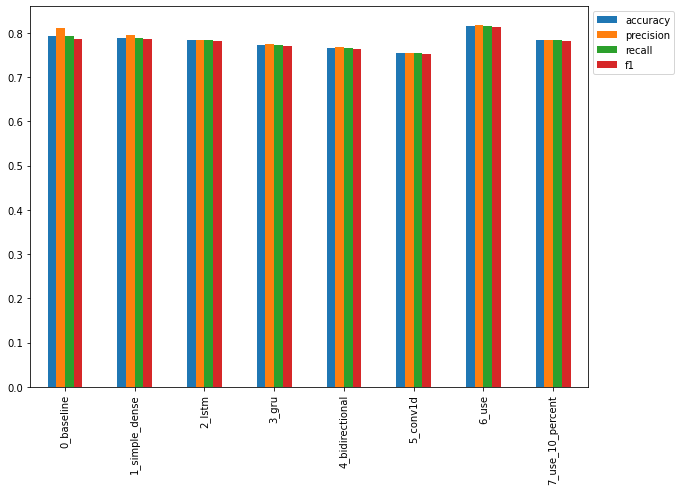

In [ ]:
# plot and compare all the model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

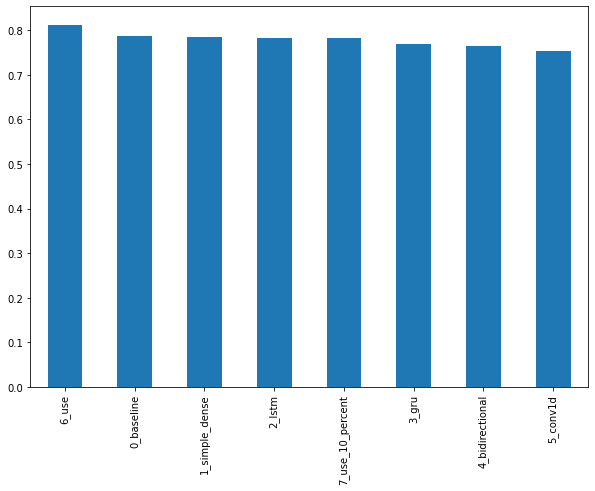

In [ ]:
# sort model results by f1-scores
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

# Uploading our Training Logs to TensorBoard.dev



In [ ]:
# Upload the TensorBoard dev records
! tensorboard dev upload  --logdir ./models/ \
  --name "NLP Modelling Experiments" \
  --one_shot # Exit the uploader once uploading is finished

2021-09-13 12:31:29.242838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-13 12:31:29.269040: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-13 12:31:29.269620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./models/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy

**Resources:** TensorBoard is great for quickly tracking experiment but for larger scale experiment and whole bunch of tracking options, check out [Weight and Biases](https://wandb.ai/home)

# Finding the most Wrong Prediction

* If our best model still isn't perfect, what examples is it getting wrong
* And of these wrong examples which ones is getting *most* wrong (those will prediction probabilites closest to the opposite class)

For example if a class should have a label of 0 but out model predicts a prediction probability of 0.999 (really close to one) or vice versa.

In [ ]:
# Download the pretrained model
! wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

In [ ]:
unzip_file('08_model_6_USE_feature_extractor.zip')

In [ ]:
# Load the pretrained model
pretrained_model = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
pretrained_model.evaluate(val_sentences, val_labels)

In [ ]:
# Make predictions
pretrained_model_pred_probs = pretrained_model.predict(val_sentences)
pretrained_model_pred = tf.squeeze(tf.round(pretrained_model_pred_probs))
pretrained_model_pred[:10]

In [ ]:
pretrained_model_pred_probs.shape

In [ ]:
# Create DataFrame with validation sentences and best performing model prediction
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": pretrained_model_pred,
                       "pred_probs": tf.squeeze(pretrained_model_pred_probs)})
val_df[:10]

In [ ]:
# Find the wrong prediction and sort according to pred_probs
most_wrong = val_df[val_df["pred"] != val_df["target"]].sort_values("pred_probs", ascending=False)
most_wrong.head() # These are False positive

In [ ]:
most_wrong.tail() # These are False Negative

## i).Check False Positive

In [ ]:
# Check the Fasle positive (Predicted 1 True 0)
for row in most_wrong[:10].itertuples():
  _,text, target, pred, pred_probs = row
  print(f"Target: {target}, Prediction: {pred}, pred_probs: {pred_probs}")
  print(f"\n{text}")
  print(f"\n\n-----")

## ii).Check False Negative

In [ ]:
# Check the false Negative (predicted 0 predicted 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"Tareget: {target}, Prediction: {pred}, Pred_Probs: {pred_probs}")
  print(f"\n{text}")
  print(f"\n\n-----")

# Make Prediction on Test Dataset

In [ ]:
# Making Prediction on Test dataset and visualizing them 
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for sample in test_samples:
  pred_prob = tf.squeeze(pretrained_model.predict([sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"{sample}")
  print(f"\n------")

# The Speed/Score Trade off

In [ ]:
# Lets make a function to measure the time of prediction
import time

def pred_timer(model, sample):
  """
  Times how long a model takes to make predictions
  """
  start_time = time.perf_counter()
  model.predict(sample)
  end_time = time.perf_counter()
  total_time = end_time-start_time
  time_per_pred = total_time/len(sample)

  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_time, model_6_time_per_pred = pred_timer(model=model_6,
                                                       sample=val_sentences)
model_6_total_time, model_6_time_per_pred

In [ ]:
# Calculate out baseline model times per pred
baseline_total_time, baseline_time_per_pred = pred_timer(model=baseline,
                                                          sample=val_senteces)
baseline_total_time, baseline_time_per_pred

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="baseline")
plt.legend()
plt.title("F1 score vs time per prediction")
plt.xlabel("Time Per Prediction")
plt.ylabel("f1-score")

# > **Finding 101** <

#  The Formation of the traning data is very important in modelling. 

Data experts warn that even an insignificant error possesses a substantial negative impact.

 The data is biased. When bias gets into the data used by machine learning for training, data integrity is compromised, and predictions become inaccurate.

-----
# ***Exercise***

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import zipfile

Get Helper Functions

In [ ]:
def unzip_file(file_name):
  import zipfile

  zip_ref = zipfile.ZipFile(file_name)
  zip_ref.extractall()
  zip_ref.close()

def create_tensorboard_callback(dir_name, experiment_name):
  """
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%D%M%Y-%h%m%s")
  create_tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

  return create_tensorboard_callback

Imort The Data and preprocess it for Training

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

In [ ]:
unzip_file("nlp_getting_started.zip")

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_df.head()

In [ ]:
train_data = train_df[["text","target"]]
test_data = test_df[["text"]]
train_data.head()

Use train_test_split to Divide the data (shuffled automatically so model doesn't learn any patterns)

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data["text"].to_numpy(),
                                                                            train_data["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42) 

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

In [ ]:

pd.DataFrame({"text": train_sentences,
              "target": train_labels}).head(50)

In [ ]:
train_data

In [ ]:
train_df.target.value_counts()

In [ ]:
# how much examples of each class of target (target-> positive, Negative)
pd.DataFrame({"target": train_labels}).target.value_counts()

In [ ]:
pd.DataFrame({"target": val_labels}).target.value_counts()

## **Q-1**

> Rebuild, compile and train `model_1`, `model_2` and `model_5` using the Keras Sequential API instead of the Functional API.

model_1 Feed-Forward Neural Network

In [ ]:
max_vocabulary = sum([len(i.split()) for i in train_sentences])
average_vocab_size = int(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

max_vocabulary, average_vocab_size

In [ ]:
# Create Vectorizor Layer
text_vectorizor = tf.keras.layers.TextVectorization(max_tokens=10000,
                                                        standardize="lower_and_strip_punctuation",
                                                        ngrams=None,
                                                        output_mode="int",
                                                        output_sequence_length=15)

In [ ]:
text_vectorizor.adapt(train_sentences)

In [ ]:
# create Embedding layer
embedding = tf.keras.layers.Embedding(input_dim=10000,
                                      output_dim=128,
                                      input_length=15)

In [ ]:
# Build the sequential model
model_1 = tf.keras.Sequential([
         text_vectorizor,
         embedding,
         tf.keras.layers.GlobalAveragePooling1D(),
         tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")                     
])

In [ ]:
model_1.summary()

In [ ]:
# Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_1.fit(x=train_sentences, y=train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels))

In [ ]:
model_1.evaluate(val_sentences, val_labels)

model_2

In [ ]:
# create the LSTM model
model_2 = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(1,), dtype=tf.string),
      text_vectorizor,
      embedding,
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.summary()

In [ ]:
# compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_2.fit(x=train_sentences, y=train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels))

In [ ]:
model_2.evaluate(val_sentences, val_labels)

model_5

In [ ]:
# create the model
model_5 = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(1,), dtype=tf.string),
      text_vectorizor,
      embedding,
      tf.keras.layers.Conv1D(filters=64,
                             kernel_size=5,
                             strides=1,
                             padding="valid"),
      tf.keras.layers.GlobalMaxPool1D(),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.summary()

In [ ]:
# compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_5.fit(x=train_sentences, y=train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels))


In [ ]:
model_5.evaluate(val_sentences, val_labels)

## **Q-2**

>Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [ ]:
# Make 10% training and val data
import random

split_10_per = int(0.1 * len(train_sentences))

train_sentences_10 = train_sentences[:split_10_per]
train_labels_10 = train_labels[:split_10_per]

len(train_sentences_10), len(train_labels_10)

In [ ]:
# Build the naive bayes model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

baseline = Pipeline([
    
    ("tfidf", TfidfVectorizer()),
    ("NB", MultinomialNB())
])

baseline.fit(train_sentences_10,
             train_labels_10)

In [ ]:
baseline.score(val_sentences, val_labels)

## **Q-3**

>Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer.

In [ ]:
import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=True,
                                        input_shape=[],
                                        dtype=tf.string)

In [ ]:
# Build the model
model = tf.keras.Sequential([
                  sentence_encoder_layer,
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

In [ ]:
# compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model.fit(x=train_sentences, y=train_labels,
          epochs=5,
          validation_data=(val_sentences, val_labels))

In [ ]:
model.evaluate(val_sentences, val_labels)

## **Q-4**

> Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the sample_submission.csv file from Kaggle (see the Files tab in Colab for what the sample_submission.csv file looks like). Once you've done this, make a submission to the Kaggle competition, how did your model perform?

In [ ]:
# Shuffle the original Training Data
train_data_shuffled = train_data.sample(frac=1, random_state=42)

In [ ]:
# Extract text and target from the shuffled training data
train_seq = train_data_shuffled["text"].to_numpy()
train_lab = train_data_shuffled["target"].to_numpy()

# conver the pandas DataFrame into numpy array
test_ds = test_data.to_numpy()
# remove (1,) dimension from test_ds
test_ds = np.array(tf.squeeze(test_ds))

test_ds,train_seq

In [ ]:
train_lab[:10]

In [ ]:
train_seq.shape, train_seq.shape, test_ds.shape

In [ ]:
# Make USE (Universal Sequence Encoder) Layer 
import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=True,
                                        input_shape=[],
                                        dtype=tf.string)

In [ ]:
# Build the model
model = tf.keras.Sequential([
                  sentence_encoder_layer,
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Get model summary
model.summary()

In [ ]:
# compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model.fit(train_seq, train_lab,
          epochs=5)

In [ ]:
# Make predictions
y_pred_probs = model.predict(test_ds)

In [ ]:
y_pred_probs[:10]

In [ ]:
# remove dimension and round off the prediction probabilites
y_pred = tf.squeeze(tf.round(y_pred_probs))

In [ ]:
y_pred[:10]

In [ ]:
# conver the submission.csv file into pandas DataFrame
sub = pd.read_csv("sample_submission.csv")

In [ ]:
# Visualize the submission pattern
sub.head()

In [ ]:
# Make the submission DataFrame
submission = pd.DataFrame({"id": sub["id"],
                           "target": y_pred})

In [ ]:
submission.head()

In [ ]:
# Convert submission DataFrame into csv file
submission.to_csv("my_submission.csv")

## **Q-5**

> Combine the ensemble predictions using the majority vote (also known as Hard voting), how does this perform compare to averaging the prediction probabilities of each model?

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# # Get voting ensemble of models
# def get_voting():
#   models = ()
#   models.append(("naive_bayes", model_0))
#   models.append(("feed-forward", model_1))
#   models.append(("lstm", model_2))
#   models.append(("gru", model_3))
#   models.append(("bidirectional", model_4))
#   models.append(("conv1d", model_5))
#   models.append(("use", model_6))

#   ensemble_result = VotingClassifier(estimators=models,
#                                     voting="hard",
#                                     flatten_transform=True # works with soft voting only
#                                     )
 
#   return ensemble_result

## **Q-6**

> Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.




In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_2(y_test, y_pred):

  """
  Plots the confusion matrix
  """

  import itertools
  import tensorflow as tf
  import matplotlib.pyplot as plt
  import numpy as np
  from sklearn.metrics import confusion_matrix

  # create the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  # normalize the confusion matrix
  cm_normal = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  classes = cm.shape[0]

  # Lets create a pretty graph
  fg, ax = plt.subplots(figsize=(10,10))
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fg.colorbar(cax)

  # Labeling our graph
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="Truth Label",
         xticks=np.arange(classes),
         yticks=np.arange(classes),
         xticklabels=np.arange(classes),
         yticklabels=np.arange(classes))

  # set xticks and xtickslabels to bottom
  ax.xaxis.tick_bottom()
  ax.xaxis.set_label_position("bottom")

  # set the labels size
  ax.xaxis.label.set_size(18)
  ax.yaxis.label.set_size(18)
  ax.title.set_size(20)

  # printing values on the grah
  # setting the threshold value for different colors
  threshold = (cm.max() + cm.min()) / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]}({cm_normal[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=15)

In [ ]:
plot_confusion_matrix_2(tf.constant(val_labels), model_6_preds)

Our model is confused on **False Negative** (true=0, pred=1) **23%** and on **True Negative 14%**


------